# Cross-Method Summary

This notebook aggregates per-method `data/evaluate/{method}/summary.csv` files, computes a weighted normalized **EPS (Expansion Performance Score)**, and produces summary tables and plots.

## How to Run

1. Press "Run All" to execute all cells
2. Metrics and plots will be saved to `data/evaluate/`

In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

project_root = Path.cwd().parents[0]
data_base = project_root / 'data'

sys.path.insert(0, str(project_root / 'src'))
from evaluate import compute_eps

print('Project root:', project_root)

Project root: /home/iailab42/lakracha0/domain-specific-query-expansion-with-llms


## Aggregate per-method summary files

In [2]:
# Load all per-method summary.csv files
summary_files = sorted((data_base / 'evaluate').glob('*/summary.csv'))
if not summary_files:
    raise FileNotFoundError('No per-method summary.csv files found under data/evaluate/*/summary.csv')

dfs = []
for p in summary_files:
    method = p.parent.name
    df_m = pd.read_csv(p)
    if 'method' not in df_m.columns:
        df_m['method'] = method
    dfs.append(df_m)

all_df = pd.concat(dfs, ignore_index=True)
all_df = all_df[['method', 'dataset', 'retrieval', 'ndcg@10', 'map', 'recall@100', 'mrr']]

all_df = compute_eps(all_df)

out_path = data_base / 'evaluate' / 'summary.csv'
out_path.parent.mkdir(parents=True, exist_ok=True)
all_df.to_csv(out_path, index=False)
print('Saved:', out_path)

display(all_df.sort_values(['method', 'dataset', 'retrieval']).reset_index(drop=True))


Saved: /home/iailab42/lakracha0/domain-specific-query-expansion-with-llms/data/evaluate/summary.csv


,method,dataset,retrieval,ndcg@10,map,recall@100,mrr,weighted_sum,eps
0,agr,climate_fever,bm25,0.055379,0.075710,0.182910,0.089535,0.082445,0.190088
1,agr,climate_fever,tfidf,0.018245,0.026017,0.134184,0.028403,0.034441,0.190088
2,agr,trec_covid,bm25,0.339929,0.381799,0.065346,0.521300,0.375256,0.190088
3,agr,trec_covid,tfidf,0.229529,0.273001,0.044283,0.391239,0.268212,0.190088
4,append,climate_fever,bm25,0.141169,0.164025,0.414083,0.206030,0.192490,0.294207
5,append,climate_fever,tfidf,0.061855,0.074728,0.359696,0.092824,0.103504,0.294207
6,append,trec_covid,bm25,0.499135,0.509804,0.092657,0.706358,0.522788,0.294207
7,append,trec_covid,tfidf,0.304830,0.327756,0.049105,0.552171,0.358045,0.294207
8,baseline,climate_fever,bm25,0.088584,0.113680,0.277275,0.135199,0.126457,0.207663
9,baseline,climate_fever,tfidf,0.025235,0.036801,0.183659,0.043266,0.048800,0.207663


## Aggregate EPS by method

In [3]:
# Aggregate EPS by method (4 methods total)
agg_df = (
    all_df.groupby('method', as_index=False)['eps']
    .mean()
    .rename(columns={'eps': 'EPS_mean'})
    .sort_values('EPS_mean', ascending=False)
)

display(agg_df)

,method,EPS_mean
1,append,0.294207
2,baseline,0.207663
0,agr,0.190088
3,reformulate,0.128591


## Plot EPS comparison per method

/home/iailab42/lakracha0/domain-specific-query-expansion-with-llms/.venv/lib/python3.10/site-packages/beir/datasets/data_loader.py:8: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


Plot saved to: /home/iailab42/lakracha0/domain-specific-query-expansion-with-llms/data/evaluate/summary.png


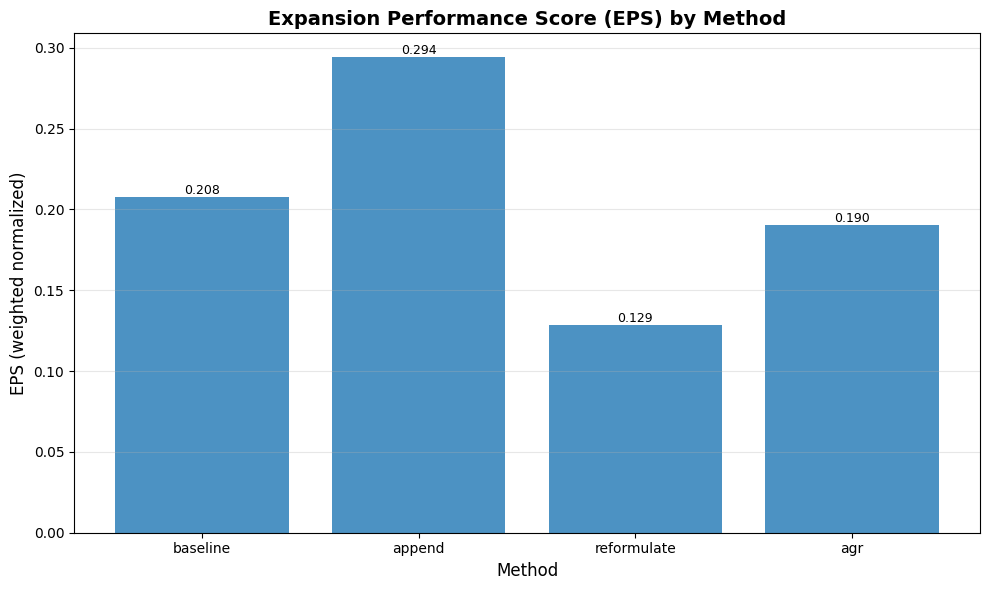

In [4]:
from notebook.plot import plot_eps_by_method

plot_path = data_base / "evaluate" / "summary.png"
plot_eps_by_method(
    agg_df=agg_df,
    plot_path=plot_path,
    method_order=["baseline", "append", "reformulate", "agr"],
    dpi=150,
)

print("Plot saved to:", plot_path)
plt.show()